<a href="https://colab.research.google.com/github/Gaks978/DML-Checkpoint/blob/main/Support_Vector_Machines_Checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
# Importing necessary libraries for SVM
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, root_mean_squared_error

In [40]:
# Loading our data
df = pd.read_csv('/content/Electric_cars_dataset.csv')
df.head()

ID  VIN (1-10)     County        City State  ZIP Code  Model Year  \
0  EV33174  5YJ3E1EC6L  Snohomish    LYNNWOOD    WA   98037.0      2020.0   
1  EV40247  JN1AZ0CP8B     Skagit  BELLINGHAM    WA   98229.0      2011.0   
2  EV12248  WBY1Z2C56F     Pierce      TACOMA    WA   98422.0      2015.0   
3  EV55713  1G1RD6E44D       King     REDMOND    WA   98053.0      2013.0   
4  EV28799  1G1FY6S05K     Pierce    PUYALLUP    WA   98375.0      2019.0   

        Make    Model                   Electric Vehicle Type  \
0      TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
1     NISSAN     LEAF          Battery Electric Vehicle (BEV)   
2        BMW       I3          Battery Electric Vehicle (BEV)   
3  CHEVROLET     VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
4  CHEVROLET  BOLT EV          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible             308   
1           Clean Alternative Fuel Vehicle Eligible              73   
2           Clean Alternative Fuel Vehicle Eligible              81   
3           Clean Alternative Fuel Vehicle Eligible              38   
4           Clean Alternative Fuel Vehicle Eligible             238   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                  32.0       109821694   
1          0                  40.0       137375528   
2          0                  27.0       150627382   
3          0                  45.0       258766301   
4          0                  25.0       296998138   

                Vehicle Location  \
0   POINT (-122.287614 47.83874)   
1  POINT (-122.414936 48.709388)   
2  POINT (-122.396286 47.293138)   
3  POINT (-122.024951 47.670286)   
4  POINT (-122.321062 47.103797)   

                                    Electric Utility Expected Price ($1k)  
0                             PUGET SOUND ENERGY INC                   50  
1                             PUGET SOUND ENERGY INC                   15  
2  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...                   18  
3      PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)                 33.9  
4  BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...                41.78

In [41]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64353 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 64353 non-null  object 
 1   VIN (1-10)                                         64353 non-null  object 
 2   County                                             64349 non-null  object 
 3   City                                               64344 non-null  object 
 4   State                                              64342 non-null  object 
 5   ZIP Code                                           64347 non-null  float64
 6   Model Year                                         64346 non-null  float64
 7   Make                                               64349 non-null  object 
 8   Model                                              64340 non-null  object 
 9   Electr

In [42]:
# Profiling report
!pip install ydata-profiling
import ydata_profiling as ydata_profiling

In [43]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="/content/Electric_cars_dataset.csv")
profile.to_file("/content/Electric_cars_dataset.csv.html")
display(profile)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 18/18 [00:10<00:00,  1.80it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
# Removing rows with missing values
df = df.dropna()

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63081 entries, 0 to 64352
Data columns (total 18 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 63081 non-null  object 
 1   VIN (1-10)                                         63081 non-null  object 
 2   County                                             63081 non-null  object 
 3   City                                               63081 non-null  object 
 4   State                                              63081 non-null  object 
 5   ZIP Code                                           63081 non-null  float64
 6   Model Year                                         63081 non-null  float64
 7   Make                                               63081 non-null  object 
 8   Model                                              63081 non-null  object 
 9   Electric Ve

In [46]:
# Dropping unnecessary columns
columns_to_drop = ["VIN (1-10)", "ID", "County", "City", "State", "ZIP Code", "Legislative District", "DOL Vehicle ID", "Vehicle Location", "Electric Utility"]
df.drop(columns = columns_to_drop, inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63081 entries, 0 to 64352
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Model Year                                         63081 non-null  float64
 1   Make                                               63081 non-null  object 
 2   Model                                              63081 non-null  object 
 3   Electric Vehicle Type                              63081 non-null  object 
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  63081 non-null  object 
 5   Electric Range                                     63081 non-null  int64  
 6   Base MSRP                                          63081 non-null  int64  
 7   Expected Price ($1k)                               63081 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 4.3+ MB


In [48]:
# Checking for duplicates
df.duplicated().sum()

np.int64(62717)

In [49]:
# Removing duplicates
df.drop_duplicates(inplace=True)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364 entries, 0 to 60381
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Model Year                                         364 non-null    float64
 1   Make                                               364 non-null    object 
 2   Model                                              364 non-null    object 
 3   Electric Vehicle Type                              364 non-null    object 
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  364 non-null    object 
 5   Electric Range                                     364 non-null    int64  
 6   Base MSRP                                          364 non-null    int64  
 7   Expected Price ($1k)                               364 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 25.6+ KB


<Axes: >

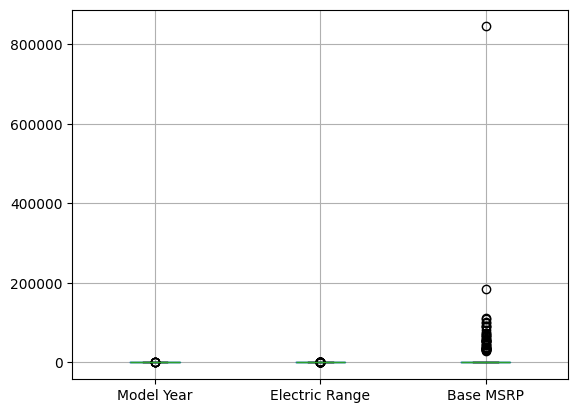

In [51]:
# Plot outliers
df.boxplot()

In [52]:
# Handle outliers for Base MSRP
Q1 = df['Base MSRP'].quantile(0.25)
Q3 = df['Base MSRP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Base MSRP'] >= lower_bound) & (df['Base MSRP'] <= upper_bound)]

In [53]:
print(f"Remaining rows after outlier removal: {df.shape[0]}")

Remaining rows after outlier removal: 324


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 324 entries, 0 to 60381
Data columns (total 8 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Model Year                                         324 non-null    float64
 1   Make                                               324 non-null    object 
 2   Model                                              324 non-null    object 
 3   Electric Vehicle Type                              324 non-null    object 
 4   Clean Alternative Fuel Vehicle (CAFV) Eligibility  324 non-null    object 
 5   Electric Range                                     324 non-null    int64  
 6   Base MSRP                                          324 non-null    int64  
 7   Expected Price ($1k)                               324 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 22.8+ KB


In [55]:
# Encoding categorical features using label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Make'] = label_encoder.fit_transform(df['Make'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Electric Vehicle Type'] = label_encoder.fit_transform(df['Electric Vehicle Type'])
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = label_encoder.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])


In [78]:
# Standardizing numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Electric Range', 'Base MSRP']] = scaler.fit_transform(df[['Electric Range', 'Base MSRP']])

In [79]:
# Select features and target
features = [
    "Model Year", "Make", "Model", "Electric Vehicle Type",
    "Electric Range", "Base MSRP",
    "Clean Alternative Fuel Vehicle (CAFV) Eligibility"
]
target = "Expected Price ($1k)"

X = df[features]
y = df[target]

In [80]:
# Splitting dataset to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Train an SVM model
svm_model = SVR(kernel = 'linear', C = 1.0)
svm_model.fit(X_train, y_train)

SVR(kernel='linear')

In [82]:
# Predict on test set
y_pred = svm_model.predict(X_test)

In [83]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 352.8936677371698
Mean Absolute Error: 12.707703101681231
Root Mean Squared Error: 18.785464267277767


# Potential ways to improve the model
- Perform feature engineering to extract new meaningful features.
- Hyperparameter tuning (e.g., using GridSearchCV on SVR’s C, gamma, etc.).
- Try different SVM kernels (sigmoid, polynomial, RBF).
- Test other ML models like Random Forest or Gradient Boosting for comparison.
